In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from abelfunctions import RiemannTheta

import layers as layers
import model as mdl

import warnings
warnings.filterwarnings('ignore')

from costfunctions import mse, crossentropy
import minimizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

/usr/lib/sagemath/local/lib/python2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


# Example 1: Sine-Mixture with gaussian noise

In [2]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

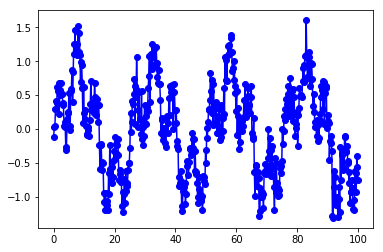

In [3]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [10]:
M = mdl.Model()
M.add(layers.ThetaUnitLayer(1,3,phase=1j))
M.add(layers.ThetaUnitLayer(3,3,phase=1j))
M.add(layers.ThetaUnitLayer(3,1,phase=1j))

In [11]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

CMA on 32 cpu(s) enabled
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 29 (seed=667906, Sat Oct 21 15:08:45 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 4.292972368105109e-01 1.0e+00 9.34e-01  9e-01  9e-01 0:01.4
    2     28 4.292052322421823e-01 1.1e+00 9.04e-01  9e-01  9e-01 0:01.8
    3     42 4.275860720192574e-01 1.1e+00 8.72e-01  9e-01  9e-01 0:02.1
   15    210 4.280042949101752e-01 1.3e+00 8.42e-01  8e-01  9e-01 0:05.3
   31    434 4.243559215775001e-01 1.5e+00 7.57e-01  7e-01  8e-01 0:09.5
   50    700 4.292535545470235e-01 1.7e+00 5.76e-01  5e-01  6e-01 0:15.0
   71    994 4.263544766288528e-01 1.7e+00 3.86e-01  3e-01  4e-01 0:21.1
   95   1330 4.253208315024550e-01 1.9e+00 3.31e-01  3e-01  4e-01 0:28.3
  100   1400 4.269066481990646e-01 1.9e+00 3.03e-01  3e-01  3e-01 0:29.7
  126   1764 4.283654976926077e-01 2.1e+00 3.33e-01  3e-01  4e-01 0:39.1
  155   2170 4.280008088734619e-01 2.4e+00 3.24e-01  3e-01  4e-01 0:49.2
  192   

array([ 0.59548387,  0.99963853, -0.99935631, -0.2486419 , -0.98049813,
        0.92900432,  1.05148156,  6.39645563,  3.69381755,  0.75736324,
        0.98886854,  0.5880419 ,  0.99685515, -0.77440519, -0.99151148,
       -0.6694313 , -0.27440006,  0.99996862,  0.05186036,  0.73265693,
       -0.19511522,  1.03209911,  4.42384868,  1.47712335,  0.36860353,
       -0.99965185,  0.99950909,  0.99997951,  2.17212281])

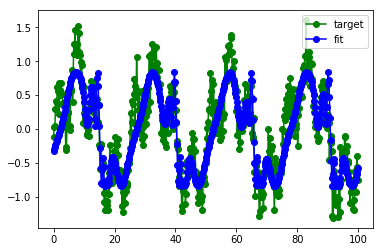

In [12]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 2: Sine-Cosine-Mixture with trend and gaussian noise

In [ ]:
def func(x,n):
    return 0.02*x+0.5*np.sin(1*x+0.1)+0.75*np.cos(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()

M.add(layers.ThetaUnitLayer(1,3))
M.add(layers.ThetaUnitLayer(3,3))
M.add(layers.ThetaUnitLayer(3,2))
M.add(layers.ThetaUnitLayer(2,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-5)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 3: MNIST (work in progress...)

In [ ]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:100,0]
X_train = MNIST_train[0:100,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

In [ ]:
M = mdl.Model()
M.add(layers.ThetaUnitLayer(784,10))
M.add(layers.SoftMaxLayer(10))
M.add(layers.MaxPosLayer(10,1))

#enc = LabelBinarizer()
#enc.fit(np.diag([1,1,1,1,1,1,1,1,1,1]))
#enc.classes_ = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#T=enc.transform(Y_train)

# ToDo: Use cross-entropy

In [ ]:
minim = minimizer.CMA(True)

minim.train(crossentropy,M, np.transpose(X_train), np.transpose(Y_train), maxiter=5)

In [ ]:
W=M.predict(np.transpose(X_train))

In [ ]:
W

In [ ]:
crossentropy(W,np.transpose(T))

In [ ]:
P=np.real(M.predict(np.transpose(X_test)))

#where_are_NaNs = np.isnan(P)
#P[where_are_NaNs] = 0
#P = np.abs(np.round(P))
P=P.reshape(P.shape[0],)

print(classification_report(Y_test,P))
print(confusion_matrix(Y_test, P))